In [1]:
import pandas as pd
import os

csv_path = '../data/raw/DF20M-metadata/DF20M-train_metadata_PROD.csv' 

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    
    print("✅ Успіх! Файл завантажено.")
    print(f"Кількість фото: {len(df)}")
    
    print("\nСписок колонок:")
    print(list(df.columns))
    
    display(df.head(3))
else:
    print(f"❌ Файл не знайдено: {csv_path}")
    print("Перевір, чи ти точно перетягнула файл у папку data/raw")

✅ Успіх! Файл завантажено.
Кількість фото: 32753

Список колонок:
['gbifID', 'eventDate', 'year', 'month', 'day', 'countryCode', 'locality', 'taxonID', 'scientificName', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'specificEpithet', 'infraspecificEpithet', 'taxonRank', 'species', 'level0Gid', 'level0Name', 'level1Gid', 'level1Name', 'level2Gid', 'level2Name', 'ImageUniqueID', 'Substrate', 'rightsHolder', 'Latitude', 'Longitude', 'CoorUncert', 'Habitat', 'image_path']


,gbifID,eventDate,year,month,day,countryCode,locality,taxonID,scientificName,kingdom,...,level2Gid,level2Name,ImageUniqueID,Substrate,rightsHolder,Latitude,Longitude,CoorUncert,Habitat,image_path
0,2862684394,2020-09-17T00:00:00,2020.0,9.0,17.0,DK,"Langesø, Morud",17215.0,Mycena crocata (Schrad.) P.Kumm.,Fungi,...,DNK.5.14_1,Nordfyns,2862684394-136762,dead wood (including bark),Uffe Nygaard,55.433810,10.200162,10.0,Unmanaged deciduous woodland,2862684394-136762.JPG
1,2238502117,2017-08-16T00:00:00,2017.0,8.0,16.0,DK,Virum,10057.0,Agaricus augustus Fr.,Fungi,...,DNK.1.28_1,Rudersdal,2238502117-320693,soil,Michael Hansen,55.800171,12.478571,5.0,garden,2238502117-320693.JPG
2,2818074328,2020-07-23T00:00:00,2020.0,7.0,23.0,DK,"Gribskov, Enghavehus",20027.0,Russula olivacea (Schaeff.) Fr.,Fungi,...,DNK.1.20_1,Hillerød,2818074328-59948,soil,Anna ploug,55.976322,12.293878,1.0,Mixed woodland (with coniferous and deciduous ...,2818074328-59948.JPG


In [2]:
duplicates = df['gbifID'].value_counts()
print(f"Максимальна кількість фото на одне спостереження: {duplicates.max()}")
print(f"Кількість спостережень з більше ніж 1 фото: {len(duplicates[duplicates > 1])}")

example_id = duplicates.index[0] 
print(f"\nПриклад gbifID={example_id}:")
display(df[df['gbifID'] == example_id][['image_path', 'Substrate', 'month']])

Максимальна кількість фото на одне спостереження: 14
Кількість спостережень з більше ніж 1 фото: 8185

Приклад gbifID=2994387304:


,image_path,Substrate,month
3396,2994387304-148015.JPG,dead wood (including bark),10.0
7145,2994387304-148021.JPG,dead wood (including bark),10.0
11137,2994387304-148019.JPG,dead wood (including bark),10.0
14925,2994387304-148010.JPG,dead wood (including bark),10.0
16208,2994387304-148009.JPG,dead wood (including bark),10.0
16535,2994387304-148007.JPG,dead wood (including bark),10.0
18611,2994387304-148011.JPG,dead wood (including bark),10.0
19528,2994387304-148014.JPG,dead wood (including bark),10.0
23668,2994387304-148020.JPG,dead wood (including bark),10.0
27381,2994387304-148012.JPG,dead wood (including bark),10.0


In [2]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

from data.mushroom_dataset import MushroomDataset
from torchvision import transforms

# 1. Налаштування
csv_file = '../data/raw/DF20M-metadata/DF20M-train_metadata_PROD.csv'
root_dir = '../data/raw/DF20M/'

# Простий трансформ: стиснути до 224x224 і перетворити в тензор
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# 2. Ініціалізація
dataset = MushroomDataset(csv_file, root_dir, transform=data_transform)

# 3. Тест: Беремо 5 випадкових прикладів
print(f"Всього у датасеті: {len(dataset)} записів")

print("\n--- Пробуємо отримати дані ---")
for i in range(5):
    sample = dataset[i]
    print(f"Фото {i}:")
    print(f"  Shape: {sample['image'].shape} (Має бути [3, 224, 224])")
    print(f"  Class ID: {sample['label']}")
    print(f"  Metadata: {sample['meta']}")
    print("-" * 20)

Всього у датасеті: 32753 записів

--- Пробуємо отримати дані ---
Фото 0:
  Shape: torch.Size([3, 224, 224]) (Має бути [3, 224, 224])
  Class ID: 0
  Metadata: {'gbif_id': 2862684394, 'month': 9.0, 'substrate': 'dead wood (including bark)', 'geo': tensor([55.4338, 10.2002])}
--------------------
Фото 1:
  Shape: torch.Size([3, 224, 224]) (Має бути [3, 224, 224])
  Class ID: 1
  Metadata: {'gbif_id': 2238502117, 'month': 8.0, 'substrate': 'soil', 'geo': tensor([55.8002, 12.4786])}
--------------------
Фото 2:
  Shape: torch.Size([3, 224, 224]) (Має бути [3, 224, 224])
  Class ID: 2
  Metadata: {'gbif_id': 2818074328, 'month': 7.0, 'substrate': 'soil', 'geo': tensor([55.9763, 12.2939])}
--------------------
Фото 3:
  Shape: torch.Size([3, 224, 224]) (Має бути [3, 224, 224])
  Class ID: 3
  Metadata: {'gbif_id': 2238560017, 'month': 9.0, 'substrate': 'soil', 'geo': tensor([55.8405, 12.0272])}
--------------------
Фото 4:
  Shape: torch.Size([3, 224, 224]) (Має бути [3, 224, 224])
  Class I

In [3]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

from data.data_setup import create_dataloaders

# Налаштування
CSV_PATH = '../data/raw/DF20M-metadata/DF20M-train_metadata_PROD.csv'
ROOT_DIR = '../data/raw/DF20M/'

# Створюємо лоадери (режим групи!)
train_dl, val_dl, num_classes = create_dataloaders(
    csv_path=CSV_PATH,
    root_dir=ROOT_DIR,
    batch_size=4, # Маленький батч для тесту
    mode='group'
)

print(f"Класів у датасеті: {num_classes}")
print(f"Батчів у тренуванні: {len(train_dl)}")

# Беремо один пакет даних
batch = next(iter(train_dl))
images = batch['images']
labels = batch['label']

print("\n--- Перевірка Батчу ---")
print(f"Розмір входу (Batch Shape): {images.shape}")
# Має бути: [4, 3, 3, 224, 224] 
# (4 гриби, по 3 фото кожен, 3 канали кольору, 224x224 пікселі)
print(f"Лейбли: {labels}")

Класів у датасеті: 180
Батчів у тренуванні: 3890

--- Перевірка Батчу ---
Розмір входу (Batch Shape): torch.Size([4, 3, 3, 224, 224])
Лейбли: tensor([  7, 128, 158, 158])


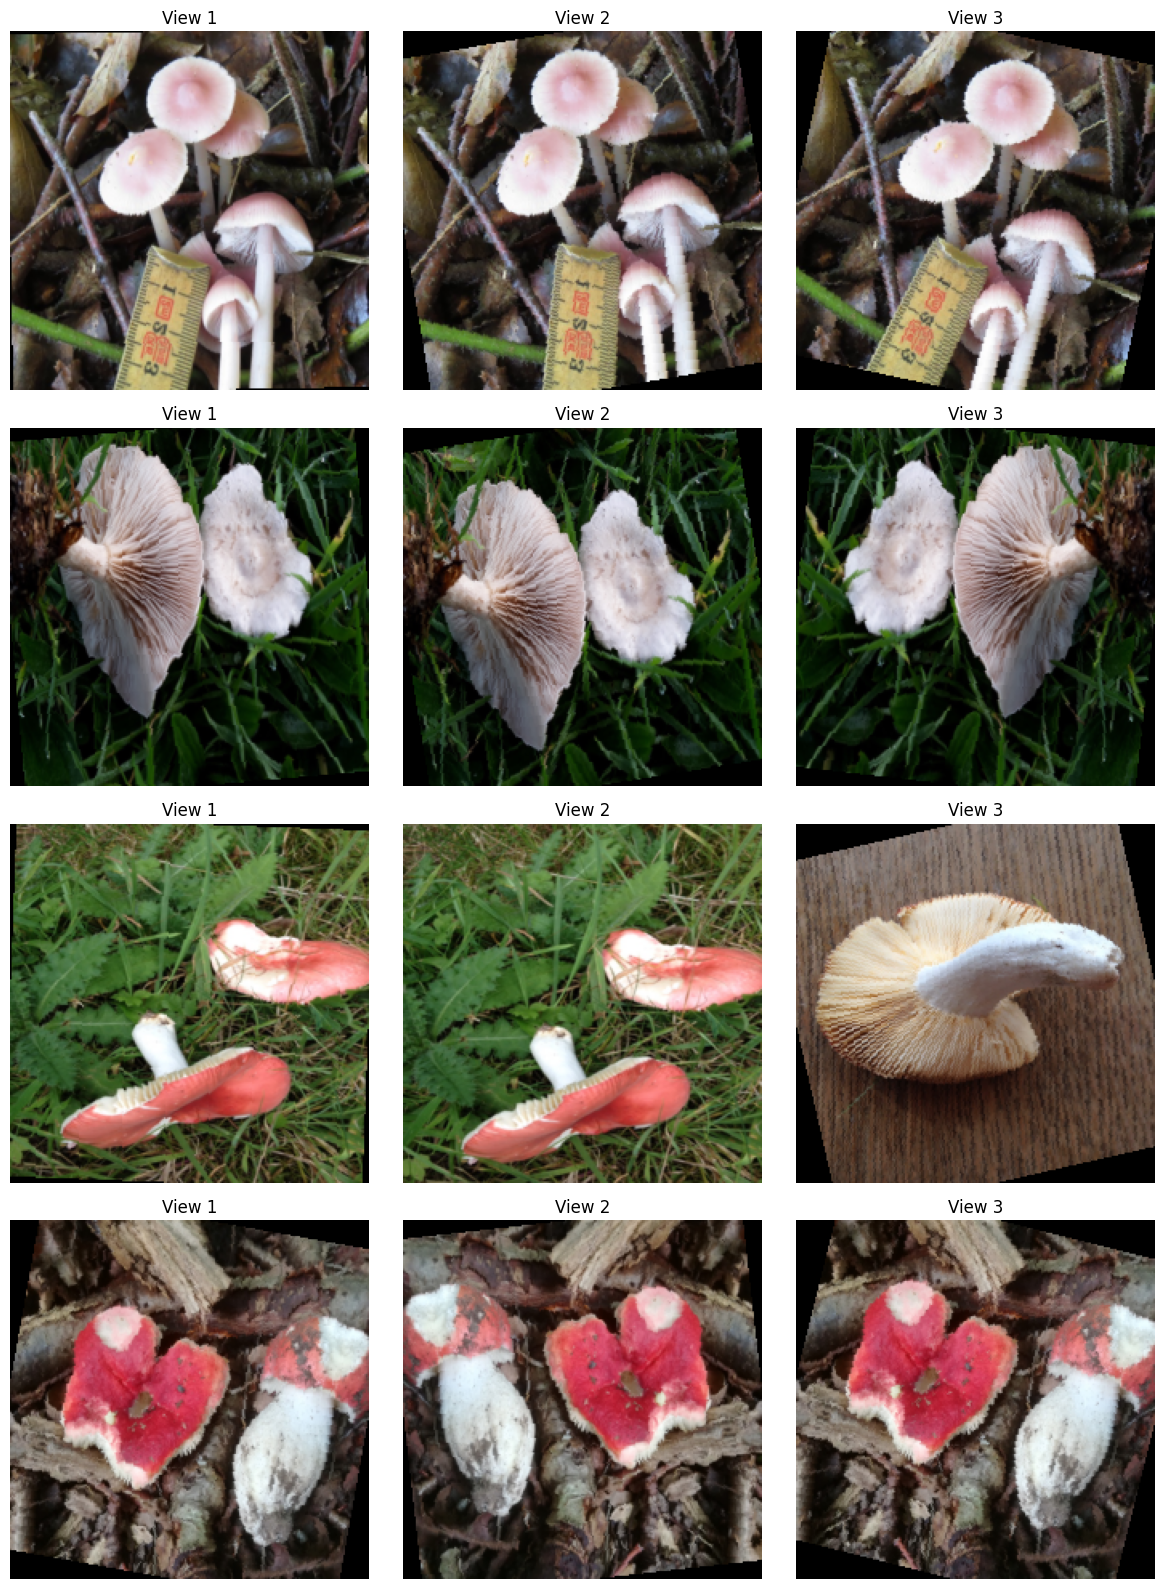

In [4]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def unnormalize(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    
    tensor = tensor * std + mean
    return tensor.clamp(0, 1) 

images = batch['images'] 
labels = batch['label']

fig, axes = plt.subplots(4, 3, figsize=(12, 16))

for i in range(4): 
    for view in range(3): 
        img_tensor = images[i][view] 
        img_display = unnormalize(img_tensor).permute(1, 2, 0).numpy()
        
        ax = axes[i, view]
        ax.imshow(img_display)
        if view == 0:
            ax.set_ylabel(f"Mushroom #{i}\nClass: {labels[i].item()}", fontsize=12)
        ax.set_title(f"View {view+1}")
        ax.axis('off')

plt.tight_layout()
plt.show()